In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

hman = pd.read_csv("F:\haberman1.csv")
print (hman.shape)
df= pd.read_csv('F:\haberman1.csv',usecols=['Age'])
#the above statement only uses age column and assigns it to the date frame df
#print df
print hman.head()#gives 1st 5 rows of hman
print hman.tail()#gives last 5 rows of hman
print hman.sample(3)#gives random 3 rows of hman
print hman.describe()#calculates measures of central tendancy
print hman.info()#info about memory taken & datatypes
print (hman.columns)
print (hman["Survival status"].value_counts())
#Since there are 3 attributes if we take the combinations we can get total of 3C2 = 3 combinations.

(306, 4)
   Age  Yr of operation  No. of +ve auxillary nodes  Survival status
0   30               64                           1                1
1   30               62                           3                1
2   30               65                           0                1
3   31               59                           2                1
4   31               65                           4                1
     Age  Yr of operation  No. of +ve auxillary nodes  Survival status
301   75               62                           1                1
302   76               67                           0                1
303   77               65                           3                1
304   78               65                           1                2
305   83               58                           2                2
     Age  Yr of operation  No. of +ve auxillary nodes  Survival status
155   52               68                           0                1
245   63 

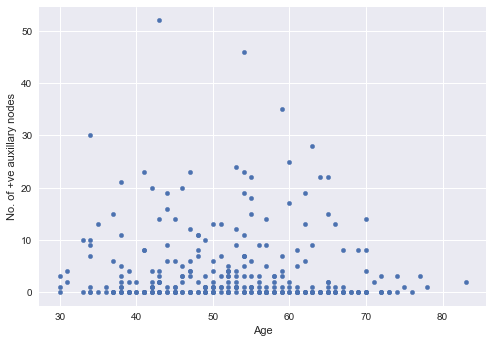

In [3]:
hman.plot(kind='scatter', x='Age', y='No. of +ve auxillary nodes') ;
plt.show()
#Let us take the graph for the Age and no. of +ve auxillary nodes.

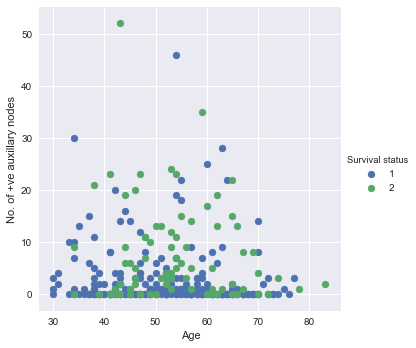

In [4]:
#From above graph we caannot conclude anything. Therefore to differentiate we Facet grid.
sns.FacetGrid(hman, hue="Survival status", size=5) \
   .map(plt.scatter, "Age", "No. of +ve auxillary nodes") \
   .add_legend();
plt.show();
#By lokking at this combination we cannot classify the survival status.

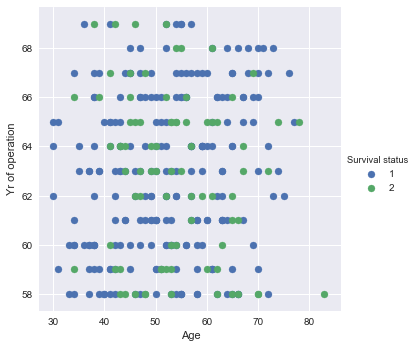

In [5]:
sns.FacetGrid(hman, hue="Survival status", size=5) \
   .map(plt.scatter, "Age", "Yr of operation") \
   .add_legend();
plt.show();
#Even for this combination the classication of survival status cannot be done.

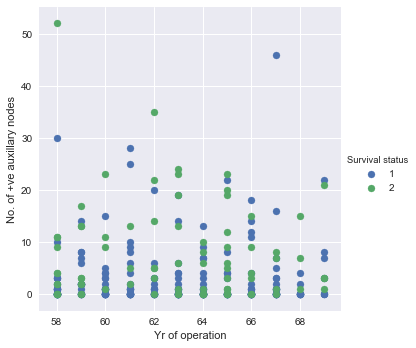

In [6]:
sns.FacetGrid(hman, hue="Survival status", size=5) \
   .map(plt.scatter, "Yr of operation", "No. of +ve auxillary nodes") \
   .add_legend();
plt.show();
#Even yr of operation and no. of +ve auxillary nodes cannot classify the survival status.

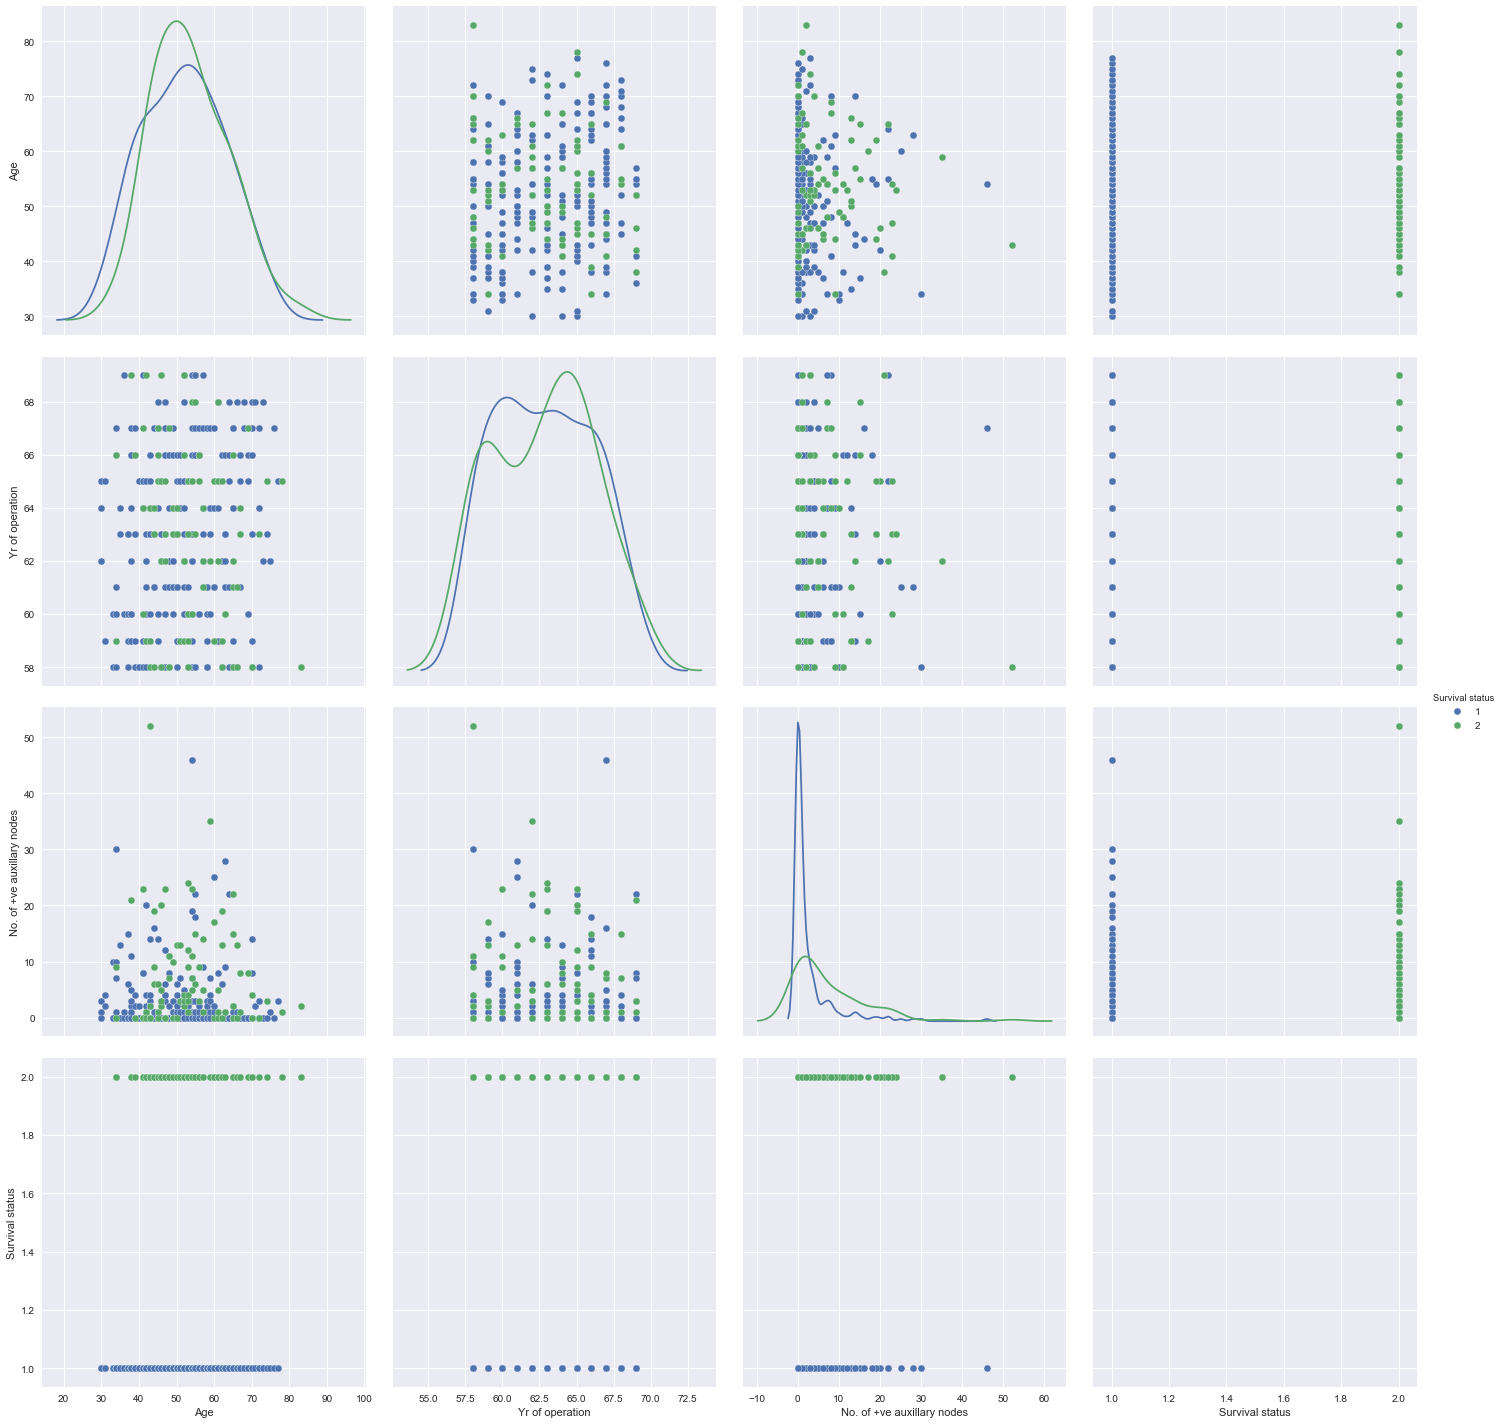

In [8]:
plt.close();
sns.pairplot(hman, hue="Survival status", size=5, diag_kind="kde");
plt.show()
#Let us consider the pair-wise plots for these attributes.

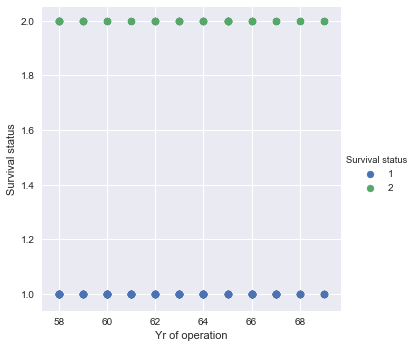

In [9]:
sns.FacetGrid(hman, hue="Survival status", size=5) \
   .map(plt.scatter, "Yr of operation", "Survival status") \
   .add_legend();
plt.show();
#Here as it can be seen in the graph that year of operation does not show huge impact on the suvival of a patient. 
#So it cannot be treated as a deciding factor.

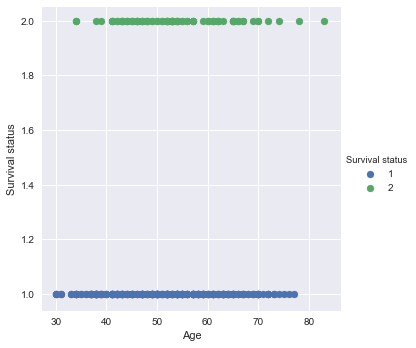

In [10]:
sns.FacetGrid(hman, hue="Survival status", size=5) \
   .map(plt.scatter, "Age","Survival status") \
   .add_legend();
plt.show();
#From the below graph we can observe that if the age of patient exceeds 79 then the patient died within 5 years but the 
#values after exceeding 79 is very neglible.

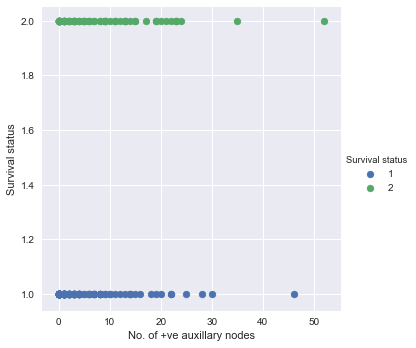

In [11]:
sns.FacetGrid(hman, hue="Survival status", size=5) \
   .map(plt.scatter, "No. of +ve auxillary nodes", "Survival status") \
   .add_legend();
plt.show();
#From the below graph we can see that the patients with number of +ve auxillary nodes more than 30 could not survive more than
# 5 years but the values are not giving accurate results as the survival status is 1 for 1 value and only for 2 values
# it is 2.Therefore by this we cannot conclude anything.

Since the graphs for the combinations does not classify accurately we now take the PDF for each attribute separately.

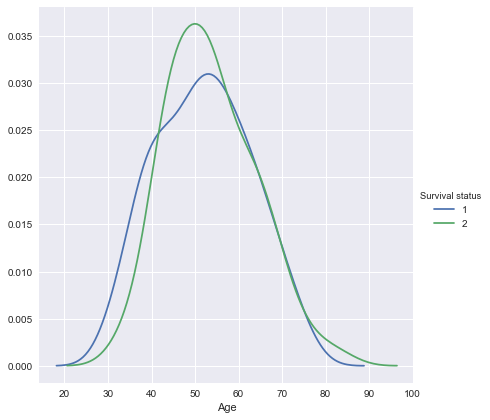

In [4]:
sns.FacetGrid(hman, hue="Survival status", size=6) \
   .map(sns.kdeplot, "Age") \
   .add_legend();
plt.show();
#this is the PDF of age.
#As it can be observed from the graph that the age for the 2 factors are long tail distributions and
# overlap to maximum extent.Here we can clearly state that age is not a deciding factor. 

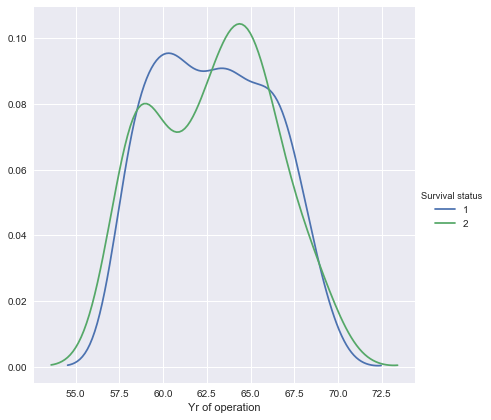

In [13]:
sns.FacetGrid(hman, hue="Survival status", size=6) \
   .map(sns.kdeplot, "Yr of operation") \
   .add_legend();
plt.show();
#this is the PDF of Year of operation.
#As it can be observed from the graph that the no. of yr of operation for the 2 factors are long tail distributions and
# overlap to maximum extent.Even the difference is also negligible. We cannot conclude anything from this observation.

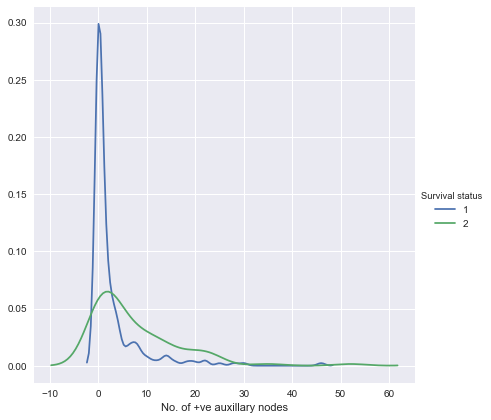

In [14]:
sns.FacetGrid(hman, hue="Survival status", size=6) \
   .map(sns.kdeplot, "No. of +ve auxillary nodes") \
   .add_legend();
plt.show();
#this is the PDF of Number of +ve auxillary nodes. 
#As it can be observed from the graph that the no. of +ve auxillary nodes for the 2 factors are long tail distributions and
# overlap to maximum extent. We cannot conclude anything from this observation.

Since all the Probability Density Function of the three factors does not give the classifying factor we now go for the box plots.

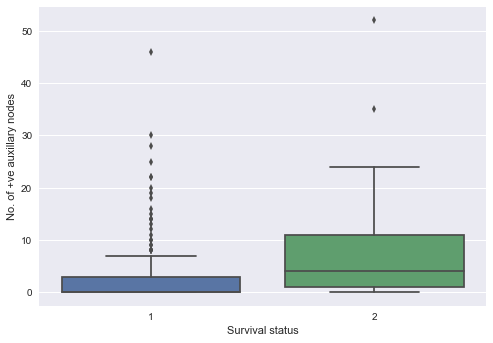

In [15]:
sns.boxplot(x='Survival status',y='No. of +ve auxillary nodes', data=hman)
plt.show()
#Patients who survived more than 5 years has number of +ve auxillary nodes 
#with maximum value of 25 
#Since we can find difference in box plots for the survival status we can consider this as the classifying factor . 
# But some values exceed this criteria as can be seen below. 
#To 60% this can be treated as the classifying factor.

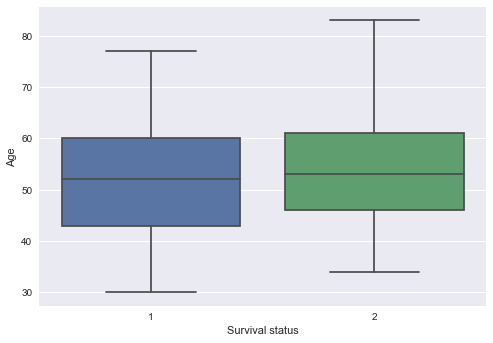

In [16]:
sns.boxplot(x='Survival status',y='Age', data=hman)
plt.show()
#We can observe that there is neglible difference for age which cannot be considered as the classifying factor.

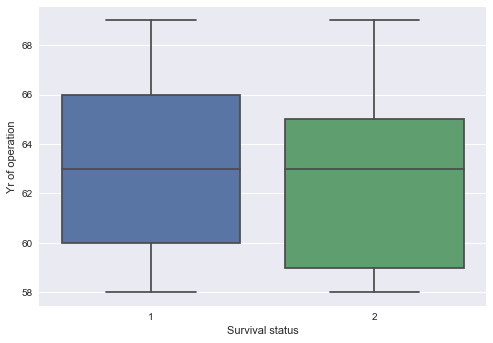

In [17]:
sns.boxplot(x='Survival status',y='Yr of operation', data=hman)
plt.show()
#Even for this Year of operation also the difference is negligible so it cannot be considered as the classifying factor.

# Conclusion
By observing the box plots we can say that number of +ve auxillary nodes affect the survival status of a patient .
Therefore it can be treated as the classifying factor.